## Create an account
#### 03.1 Winter School on Smart Contracts
##### Peter Gruber (peter.gruber@usi.ch)
2021-11-28

* Install Algorand Python SDK
* Create accounts
    * Mnemonic $\leftrightarrow$ private key
    * Private key $\rightarrow$ public key
* QR codes

## Install Algorand sdk
Use menu **Kernel/Restart Kernel** afterwards

In [ ]:
# Run this only once, then comment out
!pip install py-algorand-sdk

In [ ]:
# What to do if this does not work
#!pip install --upgrade pip
#!pip install --upgrade pip setuptools wheel

In [1]:
from algosdk import account, mnemonic

### Create a key pair and menemonic locally

`account.generate_account()` produces a pair of public and private keys

* Create a random private key
* Provide according mnemonic
* Calcualte public address from private key

**Note:** The keys only exist on your computer. We did not (yet) interact with the blockchain.

In [2]:
account.generate_account()

('4nooUH89sxbiEp+3OuygO8raNOvGXhOfEKoySOMLyb4uFpd7AGCbUziDQM7l0cFWLM8sJHI003lQCCSq81xVCA==',
 'FYLJO6YAMCNVGOEDIDHOLUOBKYWM6LBEOI2NG6KQBASKV424KUEOTRNE44')

**EXERCISE:** Run the above cell several times

#### Step 1: Obtain new private key
Add index `[0]` to obtain only the private key

In [3]:
private_key=account.generate_account()[0]                 # Why the [0]? Because generate_account() returns a list!
print(private_key)

+9Ghc9e93rEL7krxYSZAgZIVA8iH6Fef4tHrw1AMZjTKgtXSgfCtvrxBWj1rXHxNoByjzCuG9NqSHFUavG9fcQ==


#### Step 2: Private key $\leftrightarrow$ mnemonic

In [4]:
passphrase = mnemonic.from_private_key(private_key)
print(passphrase)

disorder mansion right talent runway unaware icon enough dilemma office parade chimney clinic absorb dinner trigger turtle media trophy dirt pave loan permit ability theory


In [5]:
# Quick check: do we get back from the menmonic to the private key?
private_key = mnemonic.to_private_key(passphrase)               
print(private_key)                                         # Yes!! Same as above!

+9Ghc9e93rEL7krxYSZAgZIVA8iH6Fef4tHrw1AMZjTKgtXSgfCtvrxBWj1rXHxNoByjzCuG9NqSHFUavG9fcQ==


#### Step 3: private key $\rightarrow$ public addres
Alternatively menomic $\rightarrow$ public address

In [6]:
public_address = account.address_from_private_key(private_key)
print(public_address)

ZKBNLUUB6CW35PCBLI6WWXD4JWQBZI6MFODPJWUSDRKRVPDPL5YUPWCUWI


In [7]:
mnemonic.to_public_key(passphrase)                # same

'ZKBNLUUB6CW35PCBLI6WWXD4JWQBZI6MFODPJWUSDRKRVPDPL5YUPWCUWI'

#### Step 4
There is no step 4! We can not obtain the mnemonic or the private key from the public key

### Account dictionaries
* Highly useful way to organize account data

In [8]:
Alice = {}      # Empty dictionary
Alice['public'] = public_address
Alice['private'] = private_key
Alice['passpharse'] = passphrase
Alice 

{'public': 'ZKBNLUUB6CW35PCBLI6WWXD4JWQBZI6MFODPJWUSDRKRVPDPL5YUPWCUWI',
 'private': '+9Ghc9e93rEL7krxYSZAgZIVA8iH6Fef4tHrw1AMZjTKgtXSgfCtvrxBWj1rXHxNoByjzCuG9NqSHFUavG9fcQ==',
 'passpharse': 'disorder mansion right talent runway unaware icon enough dilemma office parade chimney clinic absorb dinner trigger turtle media trophy dirt pave loan permit ability theory'}

### Function for account creation
* Useful for automatization

In [9]:
def generate_account_dict():
    from algosdk import account, mnemonic
    private_key = account.generate_account()[0]    # need [0], because generate_account() returns a list
    acc = {}
    acc['public'] = account.address_from_private_key(private_key)
    acc['private'] = private_key
    acc['mnemonic'] = mnemonic.from_private_key(private_key)
    return acc

In [10]:
Bob = generate_account_dict()
Bob

{'public': 'JJ4FSH5CX4N2JTD6RH2CDIHZXDKUSCFVXAQTIHFYPR447HGXJYBMNPWV6M',
 'private': 'B318CcmEd8ORGbDc3kJCOYFLynlP1qoZExVHUMWD3YRKeFkfor8bpMx+ifQhoPm41UkItbghNBy4fHnPnNdOAg==',
 'mnemonic': 'path vehicle lucky erode upper ignore smart quote swear arena patrol bean novel income knock stone crystal erase melody afford melt genius cheap above account'}

## QR codes

In [ ]:
# Installing the qrcode package. Run this once, then comment out
!pip install qrcode

#### Quick introduction to QR codes

In [12]:
import qrcode, urllib

In [13]:
qr = qrcode.QRCode()                         # create empty QR code
qr.add_data('https://www.usi.ch/wsc')        # add data
qr.make(fit=True)                            # create code
img = qr.make_image(fill_color="black", back_color="white")

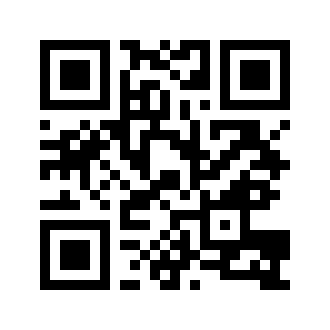

In [14]:
# Try it
img

**EXERCISE:** Try the QR code with your phone

## Payment QR code
* Specific URL for the payment
* Details here: https://developer.algorand.org/docs/get-details/transactions/payment_prompts/

In [15]:
amount = 1.2                                                        # in algos, will be multiplied by 1million below
amount_microalgo = str(int(amount*1e6))                             # in millialgos, must be integer
note_encoded   =  urllib.parse.quote('Thanks for the coffee')       # encode spaces etc

recipient = Alice['public']

# Specific URL structure
url = 'algorand://' + recipient + '?amount=' + amount_microalgo + '&note=' + note_encoded
print(url)

algorand://ZKBNLUUB6CW35PCBLI6WWXD4JWQBZI6MFODPJWUSDRKRVPDPL5YUPWCUWI?amount=1200000&note=Thanks%20for%20the%20coffee


Now create a QR code for Alice

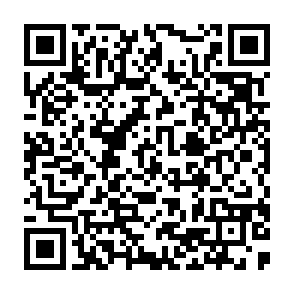

In [16]:
qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img

### Three ways to scan the QR code
- Scan with iPhone / Android Camera app $\rightarrow$ will open Algorand wallet app
- Scan with general QR scanner in Algorand wallet (top) $\rightarrow$ have to choose which account, which coin
- Start a payment manually and then scan address 

# Things that can and will go wrong
* If you loose private key and mnemonic, the money is gone
* Just because it is a QR code, it does not mean it is trustworthy

## Appendix: can you choose your Algorand Address?
* Not really, the address is the Hash of the private key
* **BUT**: we try realy many private keys until we find a match

#### Trying to obtain an Address that starts with your initials
* Let us try to find an account for *Alice*, that starts with `AL`

In [17]:
initials = "AL"
acc = generate_account_dict()
while (not acc['public'].startswith(initials)):
    acc = generate_account_dict()


In [18]:
acc

{'public': 'ALFTKKQMV3FBEY2BKUUPIIYAYGZIERAWTCNOFQBQ7LYHWMXHW4KVCEEEXY',
 'private': 'aUmxjA7AeBRVUspQ8F5++FrfQx2y0DBipPh04aR+4VkCyzUqDK7KEmNBVSj0IwDBsoJEFpia4sAw+vB7Mue3FQ==',
 'mnemonic': 'coffee share edge abstract various eagle naive ski anxiety knock dish question salt extend movie spawn ecology muscle labor blanket endorse garden someone able minor'}

#### Exercise
* Create an account with your initials
* Try to add one by one more letters to the initials
* Discuss the claims about safety on this page: https://algovanity.com

## Appendix: QR code to install an account on the phone wallet

algorand://{"mnemonic": "embrace pull ball window powder album piece kind theory asset exhibit palace sword custom village sunset sock cruel crack unlock gun lock square abstract barrel"}


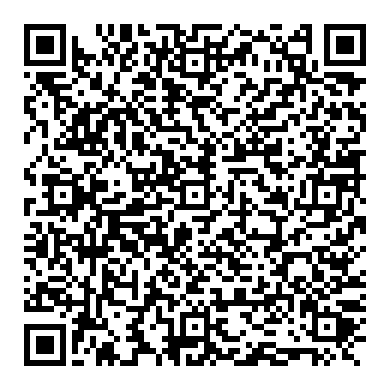

In [19]:
private_key=account.generate_account()[0]             # Why the [0]? Because generate_account() returns a list!
passphrase = mnemonic.from_private_key(private_key)
url = 'algorand://'+'{"mnemonic": "'+passphrase+'"}'
print(url)

qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img

## Appendix: Playing with QR codes
* Documentation: https://pypi.org/project/qrcode/
* Error correction levels:
    * ERROR_CORRECT_L (can correct 7%)
    * ERROR_CORRECT_M (15%)
    * ERROR_CORRECT_Q (25%)
    * ERROR_CORRECT_H (30%) <-- most robust code
* Colors are CSS colors https://www.w3schools.com/cssref/css_colors.asp

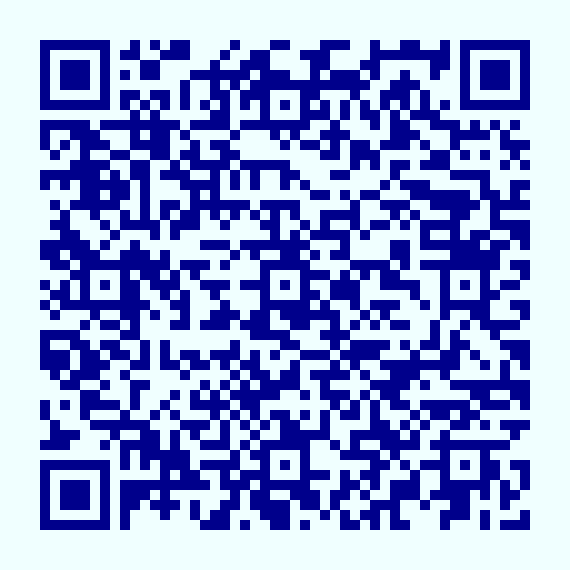

In [20]:
qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_L, 
                   box_size=10,
                   border=4)
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image(fill_color="darkblue", back_color="azure")
img

**EXERCISE** Create a QR code with white color on a black background and test it with your mobile phone.